In [1]:
#
# hw6pr4.py and hw7pr1.py ~ cs181y/cs35 spring 2022
#

#
# Note the Colab version of these problems uses  gensim 3.8.3   (the local version uses 4.0)
#


# our libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style="darkgrid")

- word2vect (average alignment score: with anger etc)
counter

In [2]:
#
# ok! On to word-vectors...
#
import gensim

In [3]:
# 
# Most important is installing gensim, the word-embedding (word2vec and glove) library
# 
# At the command-line use your-path-to-pip  or  your-path-to-pip3, then:

# <your-path>/pip install --upgrade gensim

# You may need to restart this notebook (or its kernel) in order to use it.
# You will need a large "word embeddings file," too.

# Grab    word2vec_model.txt   from the assignment page and be sure it's here:
%ls

# you will want to be sure to see    word2vec_model.txt    within the results!

app.py                      oscars2022SlapGraph.ipynb
chrisRock.csv               projDataAnalysis.ipynb
credentials.txt             slap_oscars2022.csv
dash_pract.ipynb            tweetMetrics.ipynb
hw9_project_progress.ipynb  willSmith.csv
nltk_test.ipynb             word2vec.ipynb
oscars2022.csv              word2vec_model.txt


In [4]:
#
# Create a model, m, using
# 
#     m = read_word2vec_model()
#

from gensim.models import KeyedVectors

def read_word2vec_model(filename):  
    """ a function that reads a word2vec model from the file
        "word2vec_model.txt" and returns a model object that
        we will usually name m or model...
    """
    try:
        print("Starting to load the model in ", filename, "...")
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
        print("Model loaded.\n")
    except FileNotFoundError as e:
        print(f"  [WARNING]    The file {filename} was not found.     [WARNING]  ")
        return None   # returning a placeholder, not a model

    # let's print some attributes
    print("The model built is", model, "\n")
    print("The vocabulary has", model.vectors.shape[0], "words")   # The vocabulary has 43981 words
    print("Each word is a vector of size", model.vector_size)  # 300
    print("\nTry m.get_vector('python') to see a the vector for 'python'!\n")
    model.init_sims()  # freezes the model, m, as-is (no more training)
    # we weren't going to train more, so no worries (in week7, at least)
    return model


m = read_word2vec_model(filename = "word2vec_model.txt")


Starting to load the model in  word2vec_model.txt ...
Model loaded.

The model built is <gensim.models.keyedvectors.KeyedVectors object at 0x7feaa87aa0a0> 

The vocabulary has 43981 words
Each word is a vector of size 300

Try m.get_vector('python') to see a the vector for 'python'!



/var/folders/yk/v4q7xgf968jgjzrckxn2cqx40000gn/T/ipykernel_30404/3267115252.py:27: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims()  # freezes the model, m, as-is (no more training)


In [5]:
#
# you can use Python's in operator to check if a word is in the vocabulary
#

'python' in m   # for this model, everything is lowercase

True

In [6]:
#
# 40,000 words really isn't that many
#

'google' in m   # this large number is not there (nor is "google")

False

In [7]:
# but 'python' _is_ present:

'python' in m

True

In [8]:
# let's see it!

m.get_vector('python')

array([ 0.0731009 ,  0.0326895 , -0.107592  ,  0.041441  , -0.0519943 ,
       -0.0310164 ,  0.017503  ,  0.0218788 , -0.0777341 ,  0.0756749 ,
       -0.0122264 , -0.143113  , -0.0212353 , -0.0253537 , -0.0620328 ,
       -0.0767045 ,  0.044015  ,  0.0208492 , -0.0689826 , -0.00855847,
       -0.0229084 , -0.0561127 ,  0.0509647 ,  0.080308  ,  0.0126125 ,
       -0.00868717, -0.102444  ,  0.0648642 ,  0.152379  , -0.0823672 ,
       -0.010682  ,  0.0885448 , -0.00669234, -0.0432428 , -0.0240667 ,
        0.0329469 , -0.0178891 ,  0.0607458 , -0.00242919,  0.0998703 ,
       -0.0113255 , -0.00701408,  0.0240667 ,  0.0870004 , -0.00727148,
       -0.0664086 ,  0.0383522 ,  0.0169882 ,  0.0365505 , -0.01879   ,
        0.010682  ,  0.0013996 ,  0.148261  , -0.0736157 ,  0.0638346 ,
       -0.0517369 ,  0.0844264 , -0.0432428 ,  0.0684678 ,  0.0355209 ,
        0.0684678 , -0.0169882 , -0.0253537 , -0.017503  , -0.0700121 ,
        0.0119046 , -0.0176317 , -0.0664086 , -0.047876  , -0.00

In [9]:
m.get_vector('queen')

array([ 0.00173332, -0.0474043 , -0.022896  ,  0.0407935 ,  0.0435346 ,
       -0.0293455 , -0.0235409 , -0.0715902 , -0.0651406 ,  0.0183813 ,
       -0.0249921 , -0.125767  ,  0.0343439 , -0.00026957,  0.043857  ,
        0.0372462 ,  0.0240246 , -0.015479  ,  0.0217673 ,  0.0311192 ,
        0.0628833 ,  0.045147  , -0.0780398 , -0.0391811 ,  0.021606  ,
       -0.0175751 , -0.101903  ,  0.030313  ,  0.0622383 , -0.0551438 ,
       -0.0515965 , -0.0432121 , -0.0272494 ,  0.0703003 , -0.117382  ,
       -0.0435346 ,  0.0317641 ,  0.0870691 , -0.0312804 ,  0.0606259 ,
        0.0353114 , -0.137376  ,  0.089004  , -0.00915032,  0.0580461 ,
       -0.0372462 , -0.00136046,  0.0480493 ,  0.0515965 ,  0.0883591 ,
       -0.00592554,  0.0325703 ,  0.0174944 , -0.0103193 , -0.0538539 ,
       -0.0191875 , -0.113512  , -0.0570787 ,  0.03773   , -0.0298292 ,
        0.044502  ,  0.0922288 , -0.0164464 ,  0.0428896 ,  0.0580461 ,
       -0.0732026 , -0.0039302 ,  0.0464369 , -0.059981  ,  0.03

In [10]:
snake_embedding = m.get_vector('snake')
L = snake_embedding.tolist()  # convert to a Python list to see it
print(L)

[0.02973240055143833, 0.0428926981985569, -0.07083799690008163, -0.016003500670194626, -0.06466399878263474, 0.012266700156033039, -0.014703700318932533, -0.003939960151910782, -0.05134129896759987, 0.0857853963971138, 0.06108960136771202, -0.13907599449157715, -0.0318446010351181, -0.01567859947681427, -0.07733680307865143, -0.038018498569726944, 0.029407499358057976, -0.016003500670194626, -0.01917169988155365, -0.0396432988345623, 0.030057400465011597, 0.0019801300950348377, 0.08838500082492828, 0.03769360110163689, -0.04354260116815567, 0.02307109907269478, -0.05946490168571472, 0.026158099994063377, 0.1585730016231537, -0.05719029903411865, -0.003432230092585087, 0.08773510158061981, -0.05589050054550171, -0.047116998583078384, 0.002558940090239048, 0.001294699963182211, 0.012266700156033039, -0.023558499291539192, -0.01307899970561266, 0.07603710144758224, 0.05751520022749901, -0.015759799629449844, 0.04419250041246414, 0.03818099945783615, -0.10008300095796585, -0.03428170084953

In [12]:
# Optional:  try out a different model...

# You'll need to comment-back-in these lines:

import gensim.downloader as api

info = api.info()  # show info about available models/datasets
info

g = api.load("glove-twitter-25")   # glove models word co-occurrences, not word-replaceability

[==================================================] 100.0% 104.8/104.8MB downloaded


In [13]:
#
# here is a glove vector with only 25 components
#

python_glove = g.get_vector('python')
print(python_glove)

[-0.25645  -0.22323   0.025901  0.22901   0.49028  -0.060829  0.24563
 -0.84854   1.5882   -0.7274    0.60603   0.25205  -1.8064   -0.95526
  0.44867   0.013614  0.60856   0.65423   0.82506   0.99459  -0.29403
 -0.27013  -0.348    -0.7293    0.2201  ]


In [14]:
#
# first, let's show off the "most_similar" method
#        the topn input indicates how many to include

g.most_similar("cat", topn=5)  # try python!!

[('dog', 0.9590820074081421),
 ('monkey', 0.920357882976532),
 ('bear', 0.9143136143684387),
 ('pet', 0.9108031988143921),
 ('girl', 0.8880629539489746)]

In [15]:
#
# let's try it for the word2vec model, too

m.most_similar("cat", topn=5)   
                                # the results are quite different between glove and word2vec
                                # glove is "co-occurrence" ; word2vec is "replaceability"

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464984655380249),
 ('feline', 0.7326231598854065),
 ('puppy', 0.7075452208518982)]

In [11]:
# variable-assignment statements start to get noticeably "meta" ...
python = m.get_vector('python')
snake = m.get_vector('snake')
code = m.get_vector('code')
queen = m.get_vector('queen')

In [17]:
print(np.linalg.norm(snake))  # this is the length of the vector...

# the word2vec model provides unit vectors

1.0


In [18]:
#
# the dot product is available in the numpy library
np.dot(python, snake)

# these are unit vectors, so this is the cosine "similarity"

0.6606293

In [19]:
#
# we can find the angle between the two vectors :-)
deg = np.degrees(np.arccos(0.66062))  # converting from radians to degrees
print(f"which is {deg} degrees")

which is 48.65282532960036 degrees


In [20]:
#
# The gensim library has its own similarity method:
help(m.similarity)

Help on method similarity in module gensim.models.keyedvectors:

similarity(w1, w2) method of gensim.models.keyedvectors.KeyedVectors instance
    Compute cosine similarity between two keys.
    
    Parameters
    ----------
    w1 : str
        Input key.
    w2 : str
        Input key.
    
    Returns
    -------
    float
        Cosine similarity between `w1` and `w2`.



In [21]:
# Let's try it!
m.similarity('python','snake')   # should be the same .66062...

0.66062915

In [22]:
m.distance( 'python', 'snake' )   # This is 1 - the similarity

0.33937084674835205

In [23]:
m.similarity( 'python', 'coffee' )   # let's see...

0.02125825

<br>

####  hw6pr4 task #1: exploring dataset bias

With the cell below as a starting point, explore different similarities to find one or more additional example of "dataset bias"

Include a cell explaining your example -- and the extent to which the dataset itself can _quantify_ that similarity-bias.



In [24]:
#
# with similarity, the biases of the datset can show through: let's check "programmer" vs "woman" and "man"
#
simw = m.similarity("programmer","woman")
print(f"similarity w 'woman': {simw}")

simm = m.similarity("programmer","man")
print(f"similarity w 'man': {simm}")

simp = m.similarity("programmer","person")
print(f"similarity w 'person': {simp}")

# notice that the values provide a starting-point to _quantify_ the bias in the dataset
# quantifying dataset bias is currently a very active area of research
# it would also be possible to compare both of these with m.similarity("programmer","person") # try it!

similarity w 'woman': 0.08992718160152435
similarity w 'man': 0.12616890668869019
similarity w 'person': 0.22314056754112244


In [25]:
#
# the dataset will reflect back biases carried by the source-texts
# as you explore these, see if the similarity-scores provide a way to quantify those biases
# it seems that roles that are traditionally more gendered produce larger differences
# also the gendered vs nongendered language
print("nurse example")
simw = m.similarity("nurse","woman")
print(f"similarity w 'woman': {simw}")

simm = m.similarity("nurse","man")
print(f"similarity w 'man': {simm}")

simp = m.similarity("nurse","person")
print(f"similarity w 'person': {simp}")

print("surgeon example")
simw = m.similarity("surgeon" ,"woman")
print(f"similarity w 'woman': {simw}")

simm = m.similarity("surgeon","man")
print(f"similarity w 'man': {simm}")

simp = m.similarity("surgeon","person")
print(f"similarity w 'person': {simp}")

print("boss example")
simw = m.similarity("boss" ,"woman")
print(f"similarity w 'woman': {simw}")

simm = m.similarity("boss","man")
print(f"similarity w 'man': {simm}")

simp = m.similarity("boss","person")
print(f"similarity w 'person': {simp}")

nurse example
similarity w 'woman': 0.4413556456565857
similarity w 'man': 0.25472283363342285
similarity w 'person': 0.2809489667415619
surgeon example
similarity w 'woman': 0.2604469954967499
similarity w 'man': 0.2430235892534256
similarity w 'person': 0.18987378478050232
boss example
similarity w 'woman': 0.13914363086223602
similarity w 'man': 0.26151806116104126
similarity w 'person': 0.15459895133972168


<br>

#### Computing multiple similarities...

In [26]:
# Let's compare multiple similarities:

python_snake = m.similarity('python','snake')
python_coffee = m.similarity('python','coffee')
snake_coffee = m.similarity('snake','coffee')

print(f"python_snake  similarity: {python_snake}")   # try :4.2f after the variable for formatting
print(f"python_coffee similarity: {python_coffee}")  # 4 characters wide, 2 places after the decimal point
print(f"snake_coffee  similarity: {snake_coffee}")

python_snake  similarity: 0.660629153251648
python_coffee similarity: 0.021258249878883362
snake_coffee  similarity: 0.07976284623146057


In [27]:
#
# We could imagine defining an "odd-one-out" from any collection of words, 
# simply by considering all possible similarities (and adding them up for each word)

"""
here, for example:

python_snake  similarity: .66
python_coffee similarity: .02
snake_coffee  similarity: .08

So, summing for each of the three terms:
  python:  .66 + .02 == .68
  coffee:  .08 + .02 == .10
  snake:   .66 + .08 == .74

+++ In this case, "coffee" is the odd one out  (intuitive, in some ways)


# What do you think about python, serpent, snake?
# or python, serpent, snake, code?

"""
None

In [28]:
# notice that the split function makes creating lists-of-words a bit easier
initial_words = "snake serpent python code ai ml programming".split()
initial_words

['snake', 'serpent', 'python', 'code', 'ai', 'ml', 'programming']

In [29]:
#
# here is a _single_ keyword, with similarities computed against every word w in initial_words
key = 'python'

LoS = []
LoW = []
for w in initial_words:
    if w in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,w)
        print(f"similarity between {key} and {w}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( w )
    else:
        print(f"  __  {w}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")


similarity between python and snake:   0.66
similarity between python and serpent:   0.45
similarity between python and python:   1.00
similarity between python and code:   0.11
  __  ai  __ was not in the vocabulary
similarity between python and ml:   0.08
similarity between python and programming:   0.09
LoS is [0.66062915, 0.4477138, 1.0, 0.10966148, 0.084807836, 0.090359524]
LoW is ['snake', 'serpent', 'python', 'code', 'ml', 'programming']


<br>

####  hw6pr4 task #2: computing the "odd-one-out"

Adapting the above cell as a starting point, create a function that computes the "odd one out"

That is, <tt>odd_one_out( LoW, m )</tt> should
+ take in LoW, a list-of-words
+ take in m, a gensim word-embedding model (of type KeyedVectors)
+ computing the similarities of all pairs-of-words across the elements of LoW
+ return the word with the lowest _sum_ across all of those similarities
+ (don't include any words not in the vocabulary)

There are other ways to compute "overall dissimilarity."  
+ For our purposes, this is a reasonable first approach.
+ Below is a cell with a signature line to get started:

When you have built this, test it with three new examples of your own design
+ Be sure that at least one example contains at least five words
+ How well do your examples work?
<br>

In [64]:
#
# here is a signature line for odd_one_out (a starting point)
#

def odd_one_out( LoW, m ):
    """ 
        odd_one_out should take in LoW, a list-of-words
        odd_one_out should take in m, a gensim word-embedding model (of type KeyedVectors)
        and it should return the word, w, in LoW that is _least_ like all the others
    """
    sim_dict ={}
    cLoW= [item for item in LoW if (item in m)]
    nLoW = [item for item in LoW if (item not in m)]
    for key in cLoW:
        comp_list = cLoW.copy()
        comp_list.remove(key)
          # is the word, w present in the vocabulary?
        sim_list = [m.similarity(key,w) for w in comp_list]
        sim_dict[key] = sum(sim_list)
        comp_list = cLoW
    
    print(sim_dict)
    print(f"These word(s) were not in our model: {nLoW} ")  
    best_key = min(sim_dict, key = sim_dict.get)
    return (f"{best_key} was the odd one out!")

initial_words = "snake serpent python code ai ml programming".split()
odd_one_out(initial_words, m)


{'snake': 1.3222660198807716, 'serpent': 1.2388774892315269, 'python': 1.393171787261963, 'code': 0.4473024681210518, 'ml': 0.3926144205033779, 'programming': 0.2686671717092395}
These word(s) were not in our model: ['ai'] 


'programming was the odd one out!'

In [65]:
# matches example above!
initial_words2 = "python coffee snake".split()
odd_one_out(initial_words2, m )


{'python': 0.6818874031305313, 'coffee': 0.10102109611034393, 'snake': 0.7403919994831085}
These word(s) were not in our model: [] 


'coffee was the odd one out!'

In [67]:
# our own example1
initial_words3 = "cookie coffee cake yogurt dog".split()
odd_one_out(initial_words3, m )

{'cookie': 1.1133569180965424, 'coffee': 0.790449470281601, 'cake': 1.0201400816440582, 'dog': 0.6687707006931305}
These word(s) were not in our model: ['yogurt'] 


'dog was the odd one out!'

In [73]:
# our own example2
initial_words4 = "cookie cheese ham pizza sandwich".split()
odd_one_out(initial_words4, m )

{'cookie': 1.5108186602592468, 'cheese': 1.943600058555603, 'ham': 1.7480922639369965, 'pizza': 1.9637376964092255, 'sandwich': 2.0895949602127075}
These word(s) were not in our model: [] 


'cookie was the odd one out!'

In [76]:
# our own example3
initial_words5 = "turkey cheese ham beef chicken".split()
odd_one_out(initial_words5, m )

{'turkey': 2.098513185977936, 'cheese': 1.9024181962013245, 'ham': 2.1268526315689087, 'beef': 1.9531689286231995, 'chicken': 2.2345375418663025}
These word(s) were not in our model: [] 


'cheese was the odd one out!'

<br>

####  hw6pr4 __optional__ task: visualizing similarity as a heat map

The next cell begins the process of visualizing similarity as a heat map.
+ an optional (and fun) task is to expand this into a full 2d visualization of the correlations

<br>

similarity between python and snake:   0.66
similarity between python and serpent:   0.45
similarity between python and python:   1.00
similarity between python and code:   0.11
  __  ai  __ was not in the vocabulary
similarity between python and ml:   0.08
similarity between python and programming:   0.09
LoS is [0.66062915, 0.4477138, 1.0, 0.10966148, 0.084807836, 0.090359524]
LoW is ['snake', 'serpent', 'python', 'code', 'ml', 'programming']


'Result:'

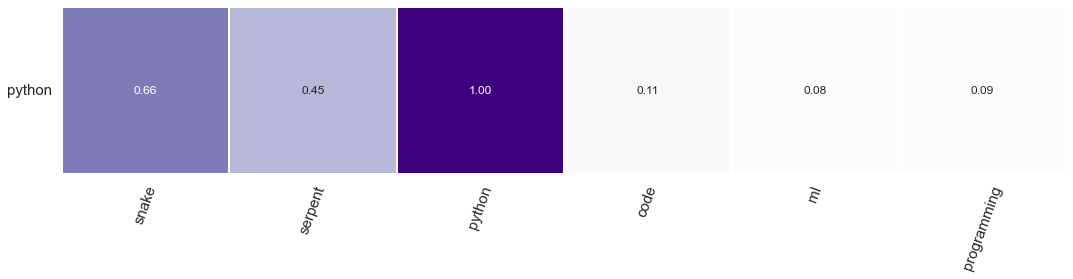

In [31]:
# visualizing similarity through a heat map

# copy of the old starting code
key = 'python'
LoS = []
LoW = []
for w in initial_words:
    if w in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,w)
        print(f"similarity between {key} and {w}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( w )
    else:
        print(f"  __  {w}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

my_data_list = [ LoS ]
my_dataframe = pd.DataFrame(my_data_list, columns=LoW)


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(18,12))  # (18, 12)
sns.heatmap(data=my_dataframe, annot=True, fmt="4.2f", linewidths=2, yticklabels=["python"], square=True, cmap="Purples", cbar=False, ax=ax)

ylocs, ylabels = plt.yticks()
plt.setp(ylabels, rotation=0, fontsize=15)
xlocs, xlabels = plt.xticks()
plt.setp(xlabels, rotation=70, fontsize=15)
"Result:"

# The goal is to output a square heatmap with all of the similarities plotted...

In [32]:
#
# This is an alternative view of the data -- within a projection of word-embedding space itself
# 
# Let's see the word vectors in two dimensions!
#
def visualize_wordvecs(wordlist, model):
    """ example of finding an outlier with word2vec and graphically """
    # 
    # Are all of the works in the model?
    #
    for w in wordlist:
        if w not in model:
            print("Aargh - the model does not contain", w)
            print("Stopping...")
            return
    #
    # Next, we use PCA, Principal Components Analysis, to toss out 298 dimensions!
    # and create a scatterplot of the words...
    #
    # Intuitive description of PCA:   https://setosa.io/ev/principal-component-analysis/
    #
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import numpy

    pca = PCA(n_components=2)             # 2 dimensions
    pca_model = pca.fit(model.vectors)    # all 43,981 words with 300 numbers each!
    LoM = [model.get_vector(w) for w in wordlist]   # list of models for each word w
    
    word_vectors = numpy.vstack(LoM)     # vstack creates a vertical column from a list
    transformed_words = pca_model.transform(word_vectors)  # transform to our 2d space

    # scatterplot
    plt.scatter(transformed_words[:,0],transformed_words[:,1])
    
    # This is matplotlib's code for _annotating_ graphs (yay!)
    for i, word in enumerate(wordlist):
        plt.annotate(word, (transformed_words[i,0], transformed_words[i,1]), size='large')
        # it's possible to be more sophisticated, but this is ok for now

    plt.show()
    return

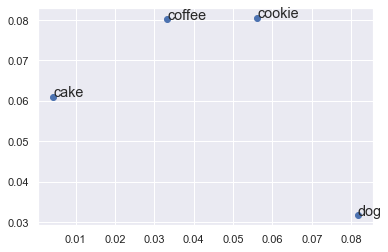

In [81]:
# matches our result that odd_one_out is dog!
initial_words3 = "cookie coffee cake dog".split()
visualize_wordvecs(initial_words3, m)

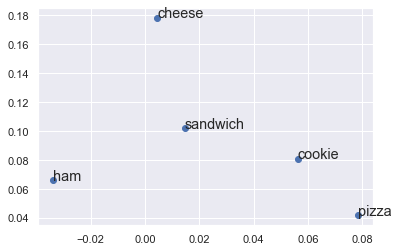

In [78]:
# does not match our odd_one_out function that cookie is the outlier??
initial_words4 = "cookie cheese ham pizza sandwich".split()
visualize_wordvecs(initial_words4, m)    # , "cereal" , "python"

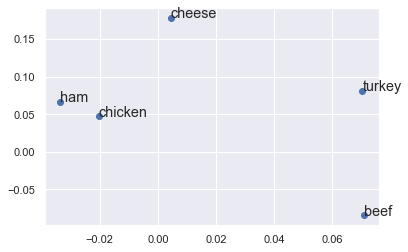

In [79]:
#hmm this one is tricky since beef is very far and looks like an outlier
# but beef is also close to turkey
initial_words5 = "turkey cheese ham beef chicken".split()
visualize_wordvecs(initial_words5, m)

<br>

####  hw6pr4 task #3: creating two more examples for "odd-one-out"

With this two-dimensional "viewport" into the data available, your task is 
+ to explore it to find an example in which the two-dimensional visualization "works"
  + that is, the farthest-away word is, in fact, the "odd-one-out"
+ AND, to find one in which the two-dimensional visualization "doesn't work"
  + that is, the farthest-away word is _not_ the "odd-one-out"

In a comment or a markdown cell, briefly explain your reasoning for these two examples.
+  Naturally, our goal is this _thinking_ 
+  These can not be inherently "correct" or "incorrect," to be sure!

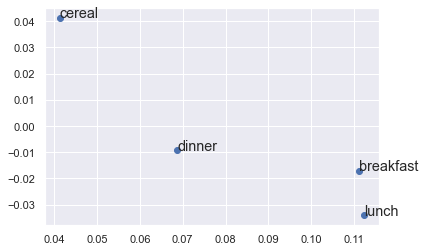

In [35]:
#
# for your explorations, use a different example from these "meal" examples
#
LoW = "breakfast lunch dinner cereal".split()  #   "breakfast lunch dinner cereal python".split()
visualize_wordvecs(LoW, m) 

In [ ]:
visualize_wordvecs(["python", "snake", "coffee"], m)

In [ ]:
visualize_wordvecs(["python", "snake", "coffee"], m)

In [ ]:
visualize_wordvecs(["python", "snake", "coffee"], m)

<br>

## hw7pr1: Analogies!

#### More word-embedding geometry:  
+ These are an introduction to hw7pr1 (for week 7's hw)
+ For the moment, we'll keep the examples and explorations in this notebook
+ Feel free to complete both problems and submit the same notebook for both -- if you're using Colab, this is probably the easiest!

In [36]:
#
# Let's take a look at some additional "geometry" of word-meanings (cool!)
#

m.most_similar(positive='python', topn=100)  # negative='snake'

[('snake', 0.6606292724609375),
 ('crocodile', 0.6591363549232483),
 ('alligator', 0.6421656012535095),
 ('boa', 0.5617719888687134),
 ('constrictor', 0.537888765335083),
 ('constrictors', 0.5356364846229553),
 ('snakes', 0.5345132350921631),
 ('anaconda', 0.5207394957542419),
 ('rabbit', 0.5074971318244934),
 ('tortoise', 0.5046289563179016),
 ('lizards', 0.5041102766990662),
 ('cobra', 0.5008569955825806),
 ('spider', 0.500656008720398),
 ('critter', 0.499703586101532),
 ('toad', 0.4993741512298584),
 ('turtle', 0.48819172382354736),
 ('elephant', 0.4803968369960785),
 ('creature', 0.47500306367874146),
 ('rattlesnake', 0.474714994430542),
 ('tiger', 0.461387038230896),
 ('frog', 0.4597766697406769),
 ('cat', 0.4588299095630646),
 ('kitten', 0.45524877309799194),
 ('rhinoceros', 0.4551759958267212),
 ('ape', 0.45376309752464294),
 ('possum', 0.45238471031188965),
 ('monkey', 0.4510401487350464),
 ('cheetah', 0.44869622588157654),
 ('serpent', 0.4477137625217438),
 ('fox', 0.447364032

In [37]:
#
# With this most_similar method, we can "subtract" vectors, too:
#

m.most_similar(positive=['python'], negative=['snake'], topn=10) 

[('Java', 0.22111037373542786),
 ('Dior', 0.2102828174829483),
 ('Notte', 0.2078552097082138),
 ('os', 0.19944755733013153),
 ('frock', 0.19739562273025513),
 ('blouse', 0.19704443216323853),
 ('plaids', 0.19696445763111115),
 ('blazer', 0.1878664642572403),
 ('gown', 0.17895957827568054),
 ('Gala', 0.17834942042827606)]

In [38]:
#
# Here, see if you can determine the analogy that is being computed using word embeddings:
# 

m.most_similar(positive=['king','woman'], negative=['man'], topn=10) 


[('queen', 0.7118192315101624),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236842632293701),
 ('queens', 0.5181134939193726),
 ('throne', 0.5005807280540466),
 ('royal', 0.493820458650589),
 ('ruler', 0.4909273386001587),
 ('princes', 0.481081485748291)]

In [39]:
#
# The word-embedding problem, hw7pr1 is to
#    (a) quantify and (b) create more analogies...
#    Below are the signatures for the functions for hw7pr1:
#

In [40]:
#
# here is a starting line for generate_analogy:

def generate_analogy(w1, w2, w3, model):
  """ returns word2vec's "answer" for w1:w2 :: w3:?? """
  w_pred = model.most_similar(positive=[w3,w2], negative=[w1], topn=100)
  return w_pred[0]

generate_analogy('man', 'woman', 'king', m)

('queen', 0.7118192315101624)

In [41]:
#
# here is a starting line for check_analogy:

def check_analogy(w1, w2, w3, w4, model):
  """ returns word2vec's 1-100 score for w1:w2 :: w3:w4 """
  w_pred = model.most_similar(positive=[w3,w2], negative=[w1], topn=100)
  result = [x[0] for x in w_pred]
  if w4 in result:
    rank = result.index(w4)
    return (100-rank) 
  return 0  

#100
print(check_analogy( "man", "king", "woman", "queen", m))
#0 
print(check_analogy( "woman", "man", "bicycle", "fish", m ))
#96
print(check_analogy( "woman", "man", "bicycle", "pedestrian", m ))

100
0
96


In [42]:
## 2 examples work well
result1 = generate_analogy("male", "female", "cock", m)
print(f"got {result1}, but with relatively lower score of {result1[1]} ")
result2a = generate_analogy("female", "male", "actress", m)
print(f"got {result2a}, but with relatively high score of {result2a[1]}")
result2b = generate_analogy("female", "male", "nun", m)
print(f"got {result2b}, but with relatively high score of {result2b[1]}")
# # 3 examples does not work as well
result3 = generate_analogy("male", "female", "rooster", m)
print(f"got {result3}, instead of expected result = hen")
result4 = generate_analogy("glide", "ice", "scoring", m),
print(f"got {result4}, instead of expected result = skating")
result5 = generate_analogy("female", "male", "stewardess", m)
print(f"got {result5}, instead of expected result = steward")
# 
print("final task for hw7pr1") 
# create five analogies with notably different "goodness" scores...
rank1 = check_analogy("male", "female", "rooster", "hen", m)
print(f"for input (male, female, rooster), my expected result = hen had rank {rank1}")
rank2 = check_analogy("glide", "ice", "scoring", "skating", m)
print(f"for input (glide, ice, scoring) expected result = skating had rank {rank2}")
rank3 = check_analogy("female", "male", "stewardess", "steward", m)
print(f"for input (female, male, stewardess), the expected result = steward had rank {rank3}")
rank4 = check_analogy("female", "male", "nun", "monk", m)
print(f"from (female, male, nun), I also expected monk, which had rank = {rank4}")
rank5 = check_analogy("avocado", "tomato", "whole", "guacamole", m)
print(f"expected result = guacamole had rank {rank5}")

### reflection: generating verbs is reletively more difficult. Additionally, if a word has a plural form, the predictor
## will refer to the plural form as the most similar word. For the best matches, assigning a word that was as opposing to
## the other two words to the negative variable produced most ideal results.

# Here, use check_analogy, as well as generate_analogy!

got ('hen', 0.44639620184898376), but with relatively lower score of 0.44639620184898376 
got ('actor', 0.7722328901290894), but with relatively high score of 0.7722328901290894
got ('priest', 0.6733502745628357), but with relatively high score of 0.6733502745628357
got ('roosters', 0.6464723348617554), instead of expected result = hen
got (('scoreless', 0.4423339068889618),), instead of expected result = skating
got ('stewardesses', 0.5693697929382324), instead of expected result = steward
final task for hw7pr1
for input (male, female, rooster), my expected result = hen had rank 83
for input (glide, ice, scoring) expected result = skating had rank 44
for input (female, male, stewardess), the expected result = steward had rank 12
from (female, male, nun), I also expected monk, which had rank = 98
expected result = guacamole had rank 0
